ANN Binaria con dataset Tic-tac-toe

In [1]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [2]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/tic_tac_toe_dataset.csv')
dataset = fit_cols(data_origin, list(data_origin.columns), Ordinal)
dataset = fit_cols(dataset, dataset.columns, Min_Max)
# dataset.head(20)

In [31]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset,['class'])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(766, 9) (766, 1)
(192, 9) (192, 1)


In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)


In [37]:
def Model1():
    model = Sequential()
    model.add(Dense(15,input_dim=9,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def Model2():
    model = Sequential()
    model.add(Dense(15,input_dim=9,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

M=Model2()


Epoch 1/100
192/192 [==============================] - 1s 5ms/step - loss: 0.7119 - accuracy: 0.4947 - val_loss: 0.6382 - val_accuracy: 0.6562
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 0.6438 - accuracy: 0.6405 - val_loss: 0.6263 - val_accuracy: 0.6562
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 0.6504 - accuracy: 0.6276 - val_loss: 0.6195 - val_accuracy: 0.6562
Epoch 4/100
192/192 [==============================] - 1s 5ms/step - loss: 0.6404 - accuracy: 0.6512 - val_loss: 0.6115 - val_accuracy: 0.6719
Epoch 5/100
192/192 [==============================] - 1s 5ms/step - loss: 0.6161 - accuracy: 0.6663 - val_loss: 0.6044 - val_accuracy: 0.6771
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 0.6036 - accuracy: 0.6968 - val_loss: 0.6011 - val_accuracy: 0.7083
Epoch 7/100
192/192 [==============================] - 1s 5ms/step - loss: 0.6252 - accuracy: 0.6837 - val_loss: 0.5889 - val_accuracy: 0.6979

Epoch 58/100
192/192 [==============================] - 1s 5ms/step - loss: 0.4592 - accuracy: 0.7866 - val_loss: 0.4922 - val_accuracy: 0.7865
Epoch 59/100
192/192 [==============================] - 1s 5ms/step - loss: 0.4494 - accuracy: 0.8034 - val_loss: 0.4896 - val_accuracy: 0.7865
Epoch 60/100
192/192 [==============================] - 1s 3ms/step - loss: 0.4708 - accuracy: 0.7771 - val_loss: 0.4789 - val_accuracy: 0.8073
Epoch 61/100
192/192 [==============================] - 1s 5ms/step - loss: 0.4407 - accuracy: 0.8023 - val_loss: 0.4702 - val_accuracy: 0.7917
Epoch 62/100
192/192 [==============================] - 1s 4ms/step - loss: 0.4456 - accuracy: 0.7853 - val_loss: 0.4750 - val_accuracy: 0.7969
Epoch 63/100
192/192 [==============================] - 1s 7ms/step - loss: 0.4417 - accuracy: 0.7779 - val_loss: 0.4889 - val_accuracy: 0.8073
Epoch 64/100
192/192 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7707 - val_loss: 0.4756 - val_accuracy:

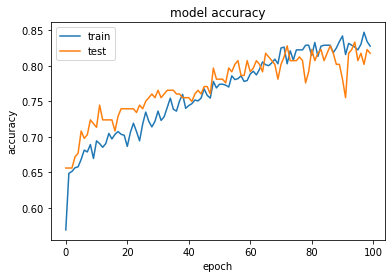

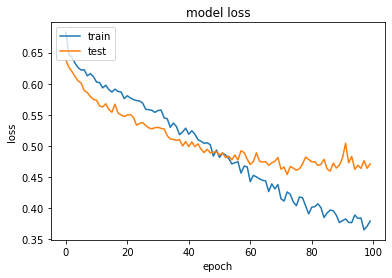

In [38]:
History=M.fit(X_train, Y_train, epochs=100, batch_size=4, validation_data=(X_test,Y_test))
Show_History(History)